In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/' , download = True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/' , train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FB140D418B0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

5


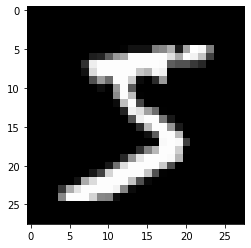

In [7]:
image , label = dataset[0]
plt.imshow(image, cmap='gray')
print(label)

3


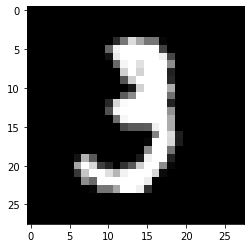

In [8]:
image , label = dataset[10]
plt.imshow(image, cmap='gray')
print(label)

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/' ,
        train=True,
        transform= transforms.ToTensor())

In [11]:
img_tensor , label = dataset[0]
img_tensor.shape , label

(torch.Size([1, 28, 28]), 5)

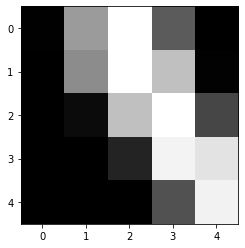

In [12]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

# Split The data into Train/Test/Validation set

In [13]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset , [50000 , 10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds , batch_size , shuffle=True)
val_loader = DataLoader(val_ds , batch_size)

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size,  num_classes)

In [18]:
print(model.weight.shape)

torch.Size([10, 784])


In [26]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(128,-1))
    print(outputs)
    break

tensor([1, 7, 9, 5, 1, 6, 4, 1, 2, 8, 0, 2, 6, 7, 5, 7, 1, 6, 4, 7, 8, 6, 2, 3,
        8, 1, 8, 0, 0, 7, 2, 9, 0, 9, 3, 2, 9, 2, 5, 9, 8, 5, 9, 4, 1, 8, 3, 0,
        8, 0, 1, 3, 9, 9, 7, 3, 6, 3, 0, 7, 5, 8, 9, 0, 4, 9, 9, 9, 3, 8, 5, 7,
        3, 1, 0, 4, 9, 9, 3, 0, 1, 2, 1, 8, 1, 2, 8, 8, 3, 3, 7, 5, 3, 3, 5, 8,
        3, 5, 4, 1, 6, 2, 0, 4, 7, 0, 0, 4, 8, 7, 1, 8, 3, 8, 1, 9, 1, 9, 2, 4,
        0, 9, 9, 4, 9, 0, 8, 4])
torch.Size([128, 1, 28, 28])
tensor([[ 0.2297, -0.0589,  0.0572,  ...,  0.1486, -0.1364, -0.0245],
        [-0.1123, -0.3290,  0.0425,  ...,  0.1603, -0.1541, -0.3556],
        [ 0.1419, -0.1603, -0.2122,  ...,  0.0103, -0.3030, -0.0372],
        ...,
        [ 0.2180, -0.3963, -0.1632,  ...,  0.3253, -0.2283, -0.0302],
        [ 0.0312, -0.1842, -0.1191,  ...,  0.1423, -0.0743, -0.2281],
        [ 0.2183, -0.3895,  0.0077,  ...,  0.0695,  0.1362, -0.3193]],
       grad_fn=<AddmmBackward0>)


In [21]:
class MnistModel(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size , num_classes)

    def forward(self , xb):
        xb=xb.reshape(batch_size , -1)
        out = self.linear(xb)
        return out

model = MnistModel()

In [27]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0200, -0.0584, -0.1520,  0.5266,  0.3604, -0.1445,  0.0806,  0.2957,
         -0.1448,  0.0849],
        [ 0.0027, -0.1504, -0.4870, -0.0642,  0.0642, -0.1830,  0.0566, -0.1136,
         -0.0941, -0.2154]])


In [30]:
import torch.nn.functional as F

probs = F.softmax(outputs , dim=1)
print(probs)
print(torch.sum(probs[0]).item())

tensor([[0.0879, 0.0845, 0.0770,  ..., 0.1205, 0.0775, 0.0976],
        [0.1116, 0.0958, 0.0684,  ..., 0.0994, 0.1013, 0.0898],
        [0.1568, 0.0655, 0.0562,  ..., 0.1032, 0.0671, 0.1228],
        ...,
        [0.1353, 0.0776, 0.0729,  ..., 0.1401, 0.0944, 0.0812],
        [0.0968, 0.0998, 0.0781,  ..., 0.1014, 0.0958, 0.0866],
        [0.1136, 0.0878, 0.0906,  ..., 0.0931, 0.1060, 0.0915]],
       grad_fn=<SoftmaxBackward0>)
0.9999998807907104


In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([3, 4, 0, 3, 7, 5, 6, 7, 7, 5, 4, 0, 0, 6, 4, 5, 4, 0, 0, 5, 3, 4, 6, 3,
        4, 7, 4, 7, 7, 4, 5, 0, 0, 0, 4, 0, 0, 7, 7, 0, 7, 0, 0, 7, 4, 7, 2, 5,
        4, 6, 4, 5, 4, 6, 6, 4, 4, 7, 4, 4, 4, 7, 5, 4, 4, 3, 4, 7, 3, 5, 0, 3,
        4, 4, 4, 0, 3, 0, 7, 0, 7, 4, 3, 5, 3, 4, 4, 4, 0, 0, 4, 0, 0, 4, 7, 0,
        6, 6, 7, 4, 7, 7, 4, 4, 4, 4, 0, 4, 0, 4, 7, 4, 0, 5, 3, 4, 4, 3, 4, 7,
        0, 4, 7, 6, 0, 7, 4, 4])
tensor([0.1518, 0.1187, 0.1568, 0.1426, 0.1190, 0.1176, 0.1313, 0.1155, 0.1272,
        0.1295, 0.1368, 0.1214, 0.1359, 0.1269, 0.1205, 0.1131, 0.1269, 0.1182,
        0.1366, 0.1234, 0.1220, 0.1367, 0.1314, 0.1362, 0.1381, 0.1190, 0.1220,
        0.1418, 0.1131, 0.1411, 0.1237, 0.1307, 0.1257, 0.1288, 0.1345, 0.1545,
        0.1357, 0.1227, 0.1300, 0.1231, 0.1126, 0.1409, 0.1122, 0.1608, 0.1327,
        0.1240, 0.1179, 0.1446, 0.1403, 0.1362, 0.1222, 0.1208, 0.1216, 0.1416,
        0.1246, 0.1359, 0.1281, 0.1193, 0.1190, 0.1195, 0.1306, 0.1205, 0.1170,
       

# Evaluation Metric And Loss Function

In [32]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [33]:
accuracy(outputs , labels)

tensor(0.1484)

In [34]:
loss_fn = F.cross_entropy

In [35]:
#  loss for curreny batch of data
loss = loss_fn(outputs, labels)
loss

tensor(2.3284, grad_fn=<NllLossBackward0>)

In [36]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [37]:
l1 = [1, 2, 3, 4, 5]

In [38]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [40]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [41]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.339749336242676, 'val_acc': 0.09622231125831604}

In [42]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9675, val_acc: 0.6089
Epoch [1], val_loss: 1.6958, val_acc: 0.7138
Epoch [2], val_loss: 1.4934, val_acc: 0.7520
Epoch [3], val_loss: 1.3409, val_acc: 0.7764
Epoch [4], val_loss: 1.2236, val_acc: 0.7875


In [43]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1317, val_acc: 0.7967
Epoch [1], val_loss: 1.0579, val_acc: 0.8043
Epoch [2], val_loss: 0.9976, val_acc: 0.8101
Epoch [3], val_loss: 0.9474, val_acc: 0.8165
Epoch [4], val_loss: 0.9050, val_acc: 0.8205


In [44]:
history3 = fit(5, 0.003, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8096, val_acc: 0.8289
Epoch [1], val_loss: 0.7441, val_acc: 0.8376
Epoch [2], val_loss: 0.6961, val_acc: 0.8454
Epoch [3], val_loss: 0.6592, val_acc: 0.8484
Epoch [4], val_loss: 0.6297, val_acc: 0.8525


In [45]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6212, val_acc: 0.8542
Epoch [1], val_loss: 0.6132, val_acc: 0.8555
Epoch [2], val_loss: 0.6057, val_acc: 0.8563
Epoch [3], val_loss: 0.5986, val_acc: 0.8576
Epoch [4], val_loss: 0.5919, val_acc: 0.8587


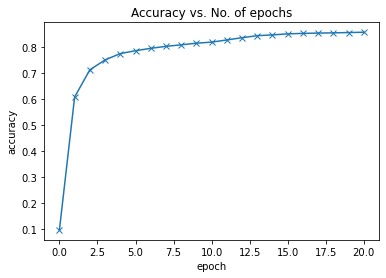

In [46]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [47]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


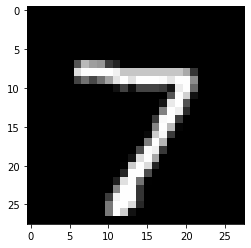

In [48]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [49]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


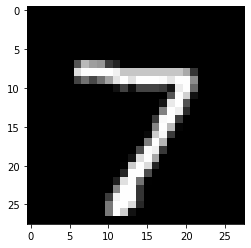

In [50]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

# Saving The Model

In [51]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

# Feed Forward Modal

In [16]:
from torchvision.utils import make_grid

images.shape torch.Size([128, 1, 28, 28])


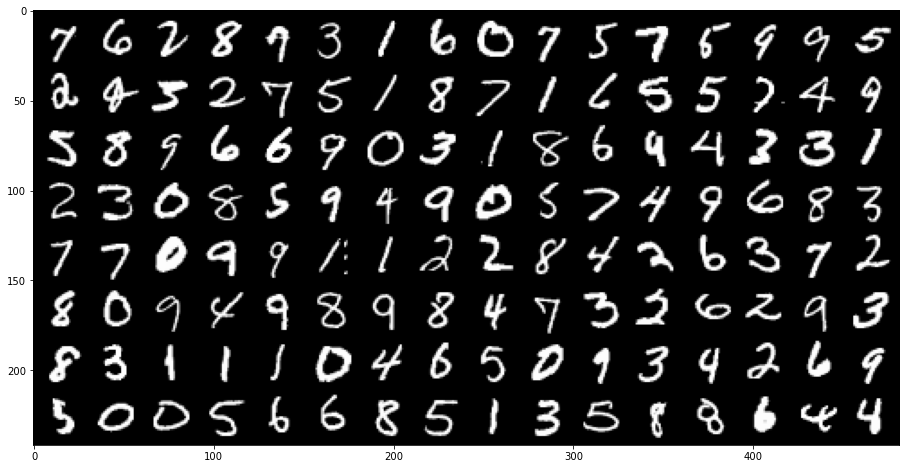

In [20]:
for images , _ in train_loader:
    plt.figure(figsize=(16,8))
    print('images.shape' , images.shape)
    plt.imshow(make_grid(images , nrow=16).permute(1,2,0))
    break

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [104]:
class MnistModel(nn.Module) :
    """Feed Forward neural network with 3 layers."""

    def __init__(self, in_size, hidden_size1 , hidden_size2, out_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size , hidden_size1)
        #hidden layer
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        #output layer
        self.linear3 = nn.Linear(hidden_size2 , num_classes)

    def forward(self , xb) :
        #flattern the image tensors 
        xb = xb.view(xb.size(0), -1)
        #1st layer
        output = self.linear1(xb)
        #activation
        output = F.relu(output)
        #outputlayer
        output = self.linear2(output)
        #activation
        #outputlayer
        output = self.linear3(output)
        return output

    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [105]:
def accuracy(outputs , labels) :
    _, preds = torch.max(outputs , dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [106]:
input_size = 784
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10

In [107]:
model = MnistModel(input_size , hidden_size1, hidden_size2, out_size= num_classes)

In [108]:
for images , labels in train_loader :
    outputs = model(images)
    loss = F.cross_entropy(outputs , labels)
    print(loss.item())
    break

2.3074662685394287


In [109]:
torch.cuda.is_available()

False

In [110]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [111]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.303032875061035, 'val_acc': 0.11511076241731644}]

In [112]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2047, val_acc: 0.9377
Epoch [1], val_loss: 0.1247, val_acc: 0.9619
Epoch [2], val_loss: 0.1280, val_acc: 0.9601
Epoch [3], val_loss: 0.1025, val_acc: 0.9691
Epoch [4], val_loss: 0.1128, val_acc: 0.9668


In [115]:
history += fit(5, 0.05, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0799, val_acc: 0.9775
Epoch [1], val_loss: 0.0798, val_acc: 0.9774
Epoch [2], val_loss: 0.0807, val_acc: 0.9767
Epoch [3], val_loss: 0.0805, val_acc: 0.9772
Epoch [4], val_loss: 0.0813, val_acc: 0.9768


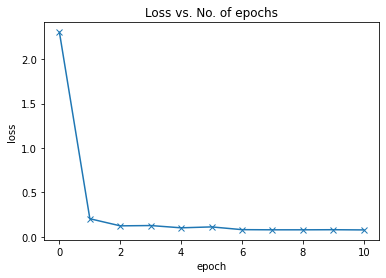

In [114]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

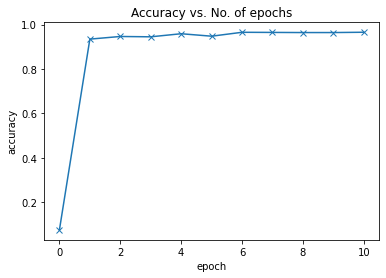

In [51]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# So, Let's save our model

In [54]:
torch.save(model.state_dict(), 'feedforward4layer_128X64.pth')